## Question 1.d)
Download the housing price data set of Windsor City of Canada ( provided on my website link). Design a housing price predictor taking only floor area (plot size), number of bedrooms, and number of bathrooms into considerations. Out of total 546 data , you may take 70% for designing the predictor and 30% for validating the design. The predictor design should be done using the following methods:

<b>d) Implement the LWR algorithm on the Housing Price data set with different tau values. Find out the tau value which will provide the best fit predictor and hence compare its results with a) , b) and c) above.<b>	

In [10]:
#Loading numpy
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
#Reading Data from Housing Price data set.csv
read_data = np.genfromtxt("Housing Price data set.csv",delimiter=',')
data = np.array(read_data[1:,1:5],dtype=np.int)

**Splitting data into x and y** \
 y = Price as label \
 x = (floor Area, number of bedrooms, number of bathrooms) i.e x1,x2,x3

In [12]:
#preprocessing and splitting
np.random.shuffle(data)     # shuffling , splitting of train and validation to unbaised
y = data[:,0:1]
x = data[:,1:]
print("Prices(top 5) :\n",y[:5])
print("\nx1,x2,x3(top 5) :\n",x[:5])
#preprocessing
m,n = x.shape
ones = np.ones((m,n+1),dtype=np.int)
ones[:,1:] = x         #broadcasting
x_data = ones

#splitting data into training(70%) and validation(30%) 
split = int(m*0.7)
x_train = x_data[:split]
y_train = y[:split]
x_valid = x_data[split:]
y_valid = y[split:]

Prices(top 5) :
 [[ 70000]
 [103000]
 [ 75000]
 [ 32000]
 [ 51900]]

x1,x2,x3(top 5) :
 [[12900     3     1]
 [ 6000     3     2]
 [ 4260     4     1]
 [ 1950     3     1]
 [ 3520     3     1]]


### Feature Scaling (using Standered Normalization)
\begin{equation}
    x' = \frac{x-\mu}{\sigma}
\end{equation}

In [92]:
m = np.mean(x_train,axis=0)
s = np.std(x_train,axis=0)+0.00001
xscale_train = (x_train-m)/s
m = np.mean(x_valid,axis=0)
s = np.std(x_valid,axis=0)+0.00001
xscale_valid = (x_valid-m)/s

In [93]:
#function for hypothesis, Loss/error and dJ/dw
def hypothesis(x,w):
    return np.dot(x,w)

## Formula used for weight function

\begin{equation}
    w^{(i)} = exp(-\frac{(x^i-x)^2}{2\tau^2})
\end{equation}


In [141]:
def weightFunc(x0, x_train, tau):
    m,n = np.shape(x_train)
    weights = np.eye((m))      # identity matrix of mxm
    
    for j in range(m):
        diff = (x_train[j]-x0)
        diff_sqr = np.dot(diff,diff.T)
        w0 = np.exp(-diff_sqr/ (2.0 * tau**2))  # calculating wi
        weights[j,j] = w0                       # storing result at digonal elements

    return weights




## Formula to calculate local weight
\begin{equation}
    w_0 = (X^T W X)^{-1} (X^T W Y)
\end{equation}

In [95]:
def localWeight(x0, x_train, y_train, tau=0.2):
    wt = weightFunc(x0, x_train, tau)
    X = x_train
    c = np.matmul(X.T,np.matmul(wt,X))+0.00001
    a = np.linalg.inv(c) 
    b = np.matmul(X.T,np.matmul(wt,y_train))
    W = np.matmul(a,b)                       # using above formula to compute weight
    return W,wt

## Locally weighted Regression method
\begin{equation}
    prediction = W^T.X
\end{equation}


\begin{equation}
    minimize [J(W) = \sum _{i=1}^{i=m} w^{(i)} (h_w(x^{(i)}) - y^{(i)})^2]
\end{equation}

In [120]:
def LWR(x_valid,y_valid,x_train, y_train, tau=0.2):
    p,q = np.shape(x_valid)
    ypred = np.zeros(p)
    loss = 0
    for i in range(p):                  # computing weight , and predicting for each sample
        x0 = x_valid[i]
        w0,wi = localWeight(x0, x_train, y_train,tau)
        ypred[i] = hypothesis(x0,w0) 
        loss += wi[i,i]*(ypred[i]-y_valid[i])**2
    return ypred,loss


### Predict (Testing)

In [132]:
prediction,loss = LWR(xscale_valid[:5],y_valid[:5],xscale_train, y_train)
print("Prediction(Price) :",np.round(prediction.flatten()))
print("Actual(Price) :",y_valid[:5].flatten())
print("Error in Prediction :",loss)

Prediction(Price) : [72916. 61811. 97770. 61672. 71316.]
Actual(Price) : [ 78000  35500  80000 101000  34000]
Error in Prediction : [3.88490073e-25]


### Plotting (actual vs predicted)

(40,)


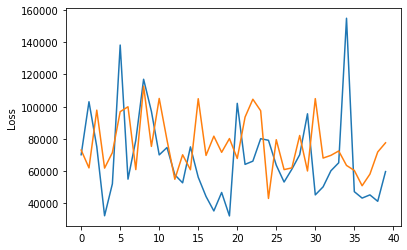

In [144]:
num=40
prediction,loss = LWR(xscale_valid[:num],y_valid[:num],xscale_train, y_train)
print(prediction.shape)
f=plt.figure()
plt.ylabel("Loss")
plt.plot(y_train[:num])
plt.plot(prediction)
plt.show()

#blue = Actual
#orange = Predicted

# Testing For different Values of $\tau$

In [126]:
prediction,loss = LWR(xscale_valid,y_valid,xscale_train, y_train,tau=0.2)
print("Error in Prediction :",loss[0])
prediction,loss = LWR(xscale_valid,y_valid,xscale_train, y_train,tau=0.4)
print("Error in Prediction :",loss[0])
prediction,loss = LWR(xscale_valid,y_valid,xscale_train, y_train,tau=0.6)
print("Error in Prediction :",loss[0])
prediction,loss = LWR(xscale_valid,y_valid,xscale_train, y_train,tau=0.8)
print("Error in Prediction :",loss[0])
prediction,loss = LWR(xscale_valid,y_valid,xscale_train, y_train,tau=1)
print("Error in Prediction :",loss[0])

Error in Prediction : 3182230784.2775826
Error in Prediction : 4588333252.1982
Error in Prediction : 5721787047.475454
Error in Prediction : 6568806824.964637
Error in Prediction : 10745445586.352104


### choice for $\tau$ = 0.2 (minimum loss)

## Comparision With Question a,b,c

<ul>
    <li>Faster(execution time) than gradient descents used in b,c</li>
    <li>Large flactuation between prediction and actual in LWR, while it is less in a,b,c</li>
    
</ul>

## Analysis and Observation
<ul>
    <li>In this dataset ,while increasing $\tau$ loss also increases</li>
    <li>To avoid singluar matrix inverse , add 0.00001 while calculating localWeight</li>
    <li>Scale data to avoid overflow</li>
    <li>at $\tau$=0.2, loss is minimum (among $\tau$ =0.2, 0,4, 0.6, 0.8, 1.0</li>
</ul>